# Stock Market and Optimal Portfolio Anaylsis scipy and quandl

This post includes code adapted from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quandl
%matplotlib inline

In [39]:
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('today')


In [40]:
# Grabbing a bunch of tech stocks for our portfolio
COST = quandl.get('WIKI/COST.11',
                  start_date = start,
                  end_date = end)
NLSN = quandl.get('WIKI/NLSN.11',
                   start_date = start,
                   end_date = end)
NKE = quandl.get('WIKI/NKE.11',
                 start_date = start,
                 end_date = end)
DIS = quandl.get('WIKI/DIS.11',
                  start_date = start,
                  end_date = end)



In [41]:
stocks = pd.concat([COST, NLSN, NKE, DIS],
                   axis = 1)
stocks.columns = ['COST','NLSN','NKE','DIS']

In [42]:
stocks

,COST,NLSN,NKE,DIS
Date,,,,
2010-01-04,49.085078,NaN,14.751122,28.960651
2010-01-05,48.936361,NaN,14.809811,28.888407
2010-01-06,49.572542,NaN,14.719521,28.734890
2010-01-07,49.332941,NaN,14.863985,28.743920
2010-01-08,48.977671,NaN,14.834641,28.789072
...,...,...,...,...
2018-03-21,186.070000,32.44,66.350000,101.820000
2018-03-22,182.640000,31.82,64.420000,100.600000
2018-03-23,180.840000,31.51,64.630000,98.540000


In [43]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

COST    0.000699
NLSN    0.000312
NKE     0.000833
DIS     0.000683
dtype: float64

In [44]:
stocks.pct_change(1).corr()

,COST,NLSN,NKE,DIS
COST,1.000000,0.265003,0.370978,0.415377
NLSN,0.265003,1.000000,0.312192,0.392808
NKE,0.370978,0.312192,1.000000,0.446150
DIS,0.415377,0.392808,0.446150,1.000000


In [45]:
stocks.head()

,COST,NLSN,NKE,DIS
Date,,,,
2010-01-04,49.085078,NaN,14.751122,28.960651
2010-01-05,48.936361,NaN,14.809811,28.888407
2010-01-06,49.572542,NaN,14.719521,28.734890
2010-01-07,49.332941,NaN,14.863985,28.743920
2010-01-08,48.977671,NaN,14.834641,28.789072


<AxesSubplot:xlabel='Date'>

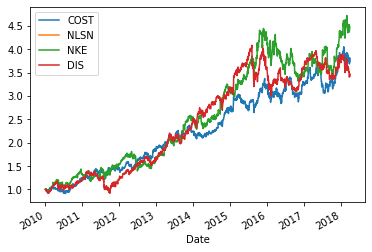

In [46]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [47]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,COST,NLSN,NKE,DIS
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,-0.003030,NaN,0.003979,-0.002495
2010-01-06,0.013000,NaN,-0.006097,-0.005314
2010-01-07,-0.004833,NaN,0.009814,0.000314
2010-01-08,-0.007201,NaN,-0.001974,0.001571


In [48]:
log_ret = np.log(stocks / stocks.shift(1))
log_ret.head()

,COST,NLSN,NKE,DIS
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,-0.003034,NaN,0.003971,-0.002498
2010-01-06,0.012916,NaN,-0.006115,-0.005328
2010-01-07,-0.004845,NaN,0.009767,0.000314
2010-01-08,-0.007228,NaN,-0.001976,0.001570


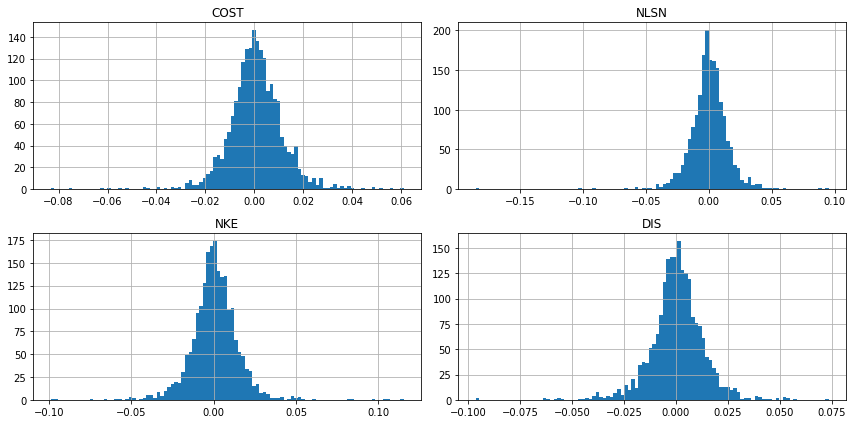

In [49]:
log_ret.hist(bins = 100,
             figsize = (12, 6));
plt.tight_layout()

In [50]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
COST,2068.0,0.000633,0.011172,-0.083110,-0.005293,0.000413,0.006618,0.060996
NLSN,1801.0,0.000198,0.015121,-0.185056,-0.007131,0.000000,0.008051,0.095201
NKE,2070.0,0.000725,0.014682,-0.098743,-0.006602,0.000656,0.008155,0.115342
DIS,2070.0,0.000596,0.013220,-0.096190,-0.005710,0.000776,0.007453,0.073531


In [51]:
log_ret.mean() * 252

COST    0.159439
NLSN    0.049979
NKE     0.182719
DIS     0.150081
dtype: float64

In [52]:
# Compute pairwise covariance of columns
log_ret.cov()

,COST,NLSN,NKE,DIS
COST,0.000125,0.000045,0.000061,0.000061
NLSN,0.000045,0.000229,0.000070,0.000077
NKE,0.000061,0.000070,0.000216,0.000087
DIS,0.000061,0.000077,0.000087,0.000175


In [53]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['COST', 'NLSN', 'NKE', 'DIS'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.11017373023155777


Expected Volatility
0.16110487214223854


Sharpe Ratio
0.6838634286260817


In [54]:
num_ports = 15000

all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

In [55]:
sharpe_arr.max()

1.042687299617254

In [56]:
sharpe_arr.argmax()

10619

In [57]:
all_weights[10619,:]

array([5.06395348e-01, 4.67772019e-04, 2.64242193e-01, 2.28894687e-01])

In [58]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

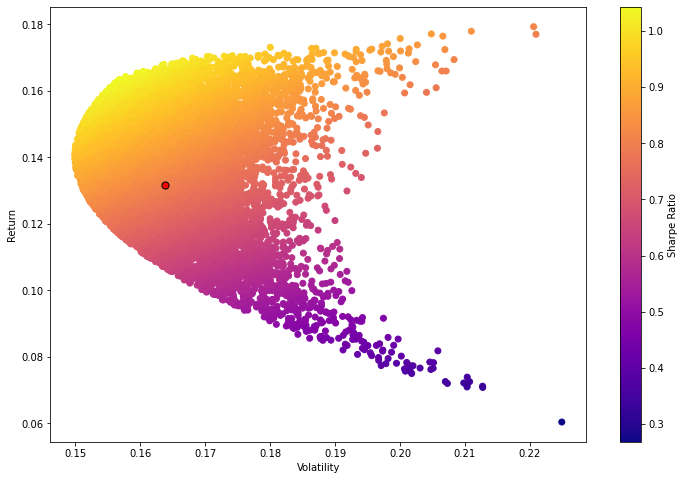

In [59]:
plt.figure(figsize = (12, 8))
plt.scatter(vol_arr,
            ret_arr,
            c = sharpe_arr,
            cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,
            max_sr_ret,
            c = 'red',
            s = 50,
            edgecolors = 'black')

In [60]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

from scipy.optimize import minimize
import numpy as np

def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type' : 'eq', 'fun': check_sum})

# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

# Initial Guess (equal distribution)
init_guess = [0.25, 0.25, 0.25, 0.25]

# Sequential Least Squares 
opt_results = minimize(neg_sharpe,
                       init_guess,
                       method = 'SLSQP',
                       bounds = bounds,
                       constraints = cons)

opt_results

     fun: -1.0442236428192482
     jac: array([-1.85623765e-04,  3.00063133e-01,  3.43203545e-04,  1.72853470e-05])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.53438392, 0.        , 0.27969302, 0.18592306])

In [61]:
opt_results.x

get_ret_vol_sr(opt_results.x)

array([0.16421049, 0.15725605, 1.04422364])

In [62]:
frontier_y = np.linspace(0, 0.3, 100)

In [63]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,
                      init_guess,
                      method = 'SLSQP',
                      bounds = bounds,
                      constraints = cons)
    
    frontier_volatility.append(result['fun'])

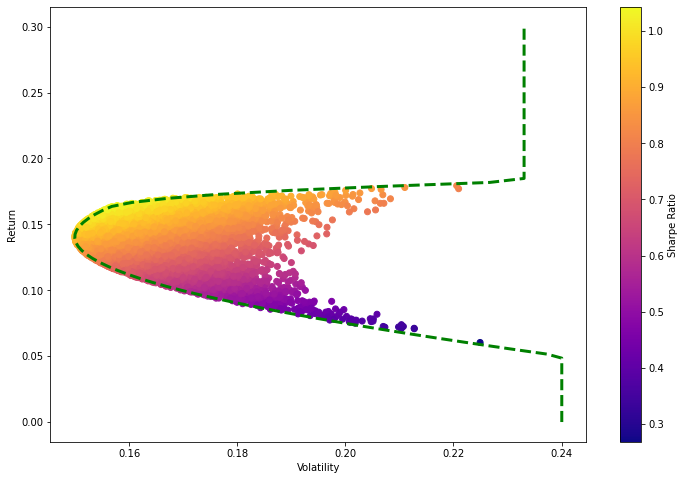

In [64]:
plt.figure(figsize = (12, 8))
plt.scatter(vol_arr,
            ret_arr,
            c = sharpe_arr,
            cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,
         frontier_y,
         'g--',
         linewidth = 3)